#### Insurance Forecast
- We will try to predict the individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\devri\Desktop\global_ai_hub\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Exploratory Data Analysis (EDA)
##### Content;
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance


In [3]:
# Let's see the descriptive statistics summary of our dataframe.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
# See if there is any "null" values in any of the variables and let's look on their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Let's look at the distribution of the bmi on the data.
df["bmi"].describe().T

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

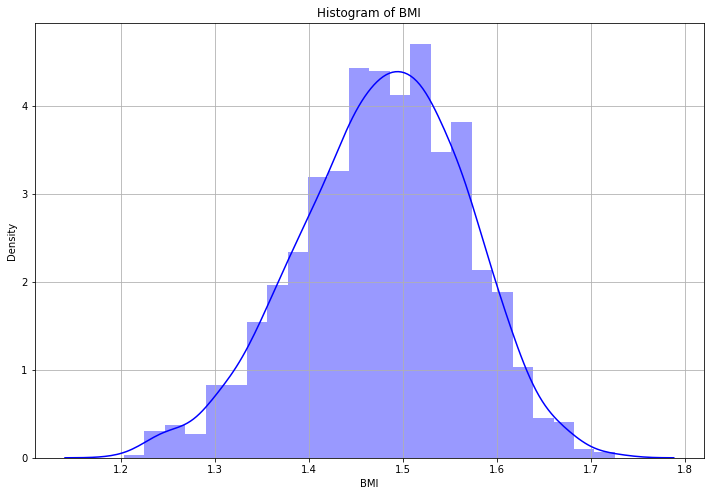

In [6]:
# Visualize the distribution of "bmi"
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(np.log10(df['bmi']), kde = True, color = 'b' )
plt.xlabel('BMI')
plt.title('Histogram of BMI')
plt.grid(True)
plt.show()

As we can see "bmi" variable has a normal distribution. It showing that data near the mean are more frequent than the data far from the mean.

In [ ]:
# Smoker and charges

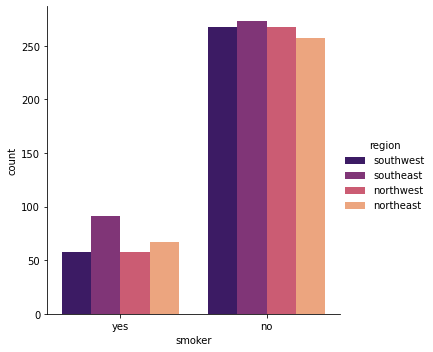

In [7]:
# Smoking rates by region
sns.catplot(x="smoker", kind="count",hue = 'region', palette="magma", data=df)

We can say that the number of people who do not smoke is higher in all 4 regions. But when we look at the smokers we see that the people on southeast, smokes more.

In [15]:
# First, let's look at the gender distribution on the data.
gender = df["sex"].value_counts()
gender

male      676
female    662
Name: sex, dtype: int64

Text(0, 0.5, 'Density')

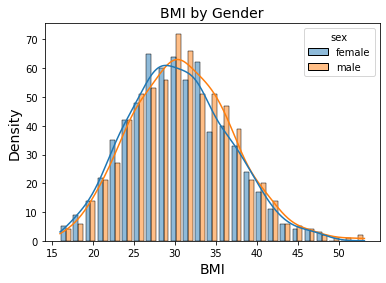

In [17]:
# BMI's by gender
sns.histplot(data=df, x="bmi", hue="sex", multiple="dodge", shrink=.8, kde=True)
plt.title('BMI by Gender', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)

We can see the gender and bmi distribution by looking at this chart. We can say that generally, the men have a higher body mass index than women.

In [20]:
# First, let's look at the children counts.
children = df["children"].value_counts()
children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

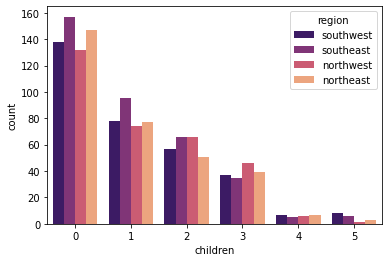

In [21]:
# Now let's look at the Children by region
ax = sns.countplot(x="children",hue="region", data=df, palette="magma")

We can see the number of children by region. 

<AxesSubplot:xlabel='age', ylabel='bmi'>

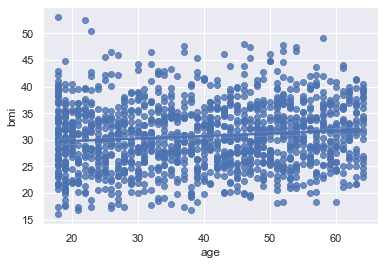

In [48]:
# Age and bmi
sns.regplot(x=df["age"], y=df["bmi"])